In [61]:
import matplotlib.pyplot as plt
import re
import numpy as np

In [62]:
def scale(val, src, dst):
        """
        Scale the given value from the scale of src to the scale of dst.
        """
        return ((val - src[0]) / (src[1]-src[0])) * (dst[1]-dst[0]) + dst[0]
def f11(data):
    l1=[]
    for x in data:
        if x < s1:
            l1.append(x)
        elif x<s2:
            l1.append(scale(x, source_scale_1, destination_scale_1) )
        elif x<s3: 
            l1.append(scale(x, source_scale_2, destination_scale_2))
        elif x<s4: 
            l1.append(scale(x, source_scale_3, destination_scale_3))
        else:
            l1.append(scale(x, source_scale_4, destination_scale_4))
    return l1

s1=10
s2=100
s3=1000
s4=10000
s5=20000

d1=20
d2=35
d3=50
d4=80
d5=100

source_scale_1 = (s1, s2) # Scale values between 100 and 600
destination_scale_1 = (d1, d2) # to a scale between 100 and 150
source_scale_2 = (s2, s3) # Scale values between 100 and 600
destination_scale_2 = (d2, d3) # to a scale between 100 and 150
source_scale_3 = (s3, s4) # Scale values between 100 and 600
destination_scale_3 = (d3, d4) # to a scale between 100 and 150
source_scale_4 = (s4, s5) # Scale values between 100 and 600
destination_scale_4 = (d4, d5) # to a scale between 100 and 150

def f11(data):
    l1=[]
    for x in data:
        if x < s1:
            l1.append(x)
        elif x<s2:
            l1.append(scale(x, source_scale_1, destination_scale_1) )
        elif x<s3: 
            l1.append(scale(x, source_scale_2, destination_scale_2))
        elif x<s4: 
            l1.append(scale(x, source_scale_3, destination_scale_3))
        else:
            l1.append(scale(x, source_scale_4, destination_scale_4))
    return l1

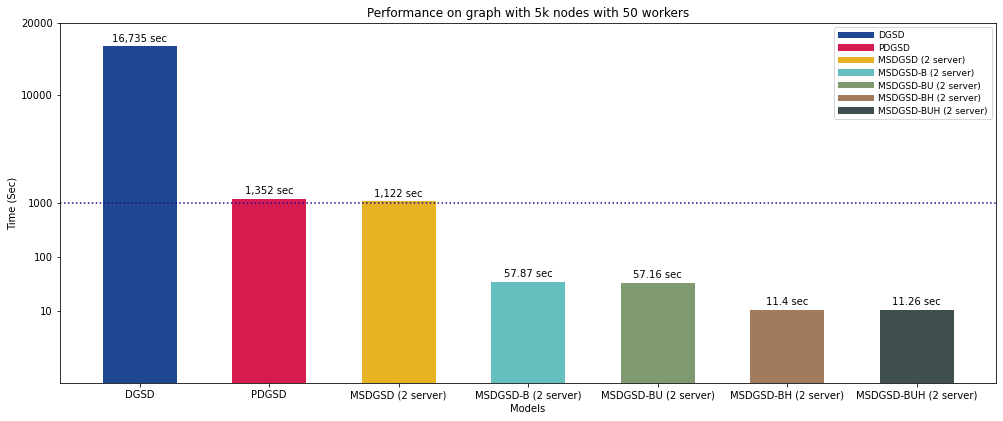

In [137]:
dt={'DGSD':16735,'PDGSD':1352,'MSDGSD (2 server)':1122,'MSDGSD-B (2 server)':57.87,'MSDGSD-BU (2 server)':57.16,'MSDGSD-BH (2 server)':11.40,'MSDGSD-BUH (2 server)':11.26}

# Set up a simple plot
fig = plt.figure(figsize=(13,5))
ax = plt.Axes(fig, [0.,0.,1.,1.])
fig.add_axes(ax)

# Set the y-ticks to a custom scale
ax.set_yticks([d1,d2,d3,d4,d5])
ax.set_ylim(0, d5)
# Set the labels to the actual values
ax.set_yticklabels([s1,s2,s3,s4,s5])

x_axis = np.arange(len(dt))
xtick_loc=[]
i=1
f=0.7
w=0.4
Colors=["#1F4690","#D61C4E","#E6B325","#66BFBF","#809A6F","#A27B5C","#3F4E4F"]
locs, labels = plt.xticks()
for k,v in dt.items():

    bars=ax.bar(f*i, f11([v]), width=(w), label = k,color=Colors[i-1])
    for p in bars:
        height = p.get_height()
        ax.annotate('{:,} sec'.format(v),
          xy=(p.get_x() + p.get_width() / 2, height),
          xytext=(0, 3), # 3 points vertical offset
          textcoords="offset points",ha='center', va='bottom')
    xtick_loc.append(f*i)
    
    i=i+1




    
plt.axhline(y=f11([1000]), c='#1F0690',linestyle='dotted')
plt.xticks(xtick_loc, list(dt.keys()))

# Add legend
plt.title('Performance on graph with 5k nodes with 50 workers')
plt.legend(loc='upper right',handlelength=4,labelspacing=0.4,fontsize=9,frameon = True,handletextpad=0.5,)
plt.xlabel('Models')
plt.ylabel('Time (Sec)')
plt.savefig('COMP.jpg',bbox_inches='tight', dpi=150)
# Display

plt.show()